#           Survival Analysis on Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import os as os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\A_R_COMPUTERS\Desktop\BA\Data\train.csv")

In [3]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
data.shape

(891, 12)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data[data["Parch"] == 0].count()

PassengerId    678
Survived       678
Pclass         678
Name           678
Sex            678
Age            521
SibSp          678
Parch          678
Ticket         678
Fare           678
Cabin          141
Embarked       676
dtype: int64

In [8]:
data[data["Fare"]==0].count()

PassengerId    15
Survived       15
Pclass         15
Name           15
Sex            15
Age             7
SibSp          15
Parch          15
Ticket         15
Fare           15
Cabin           3
Embarked       15
dtype: int64

In [9]:
data["Fare"][data["Survived"] == 0].mean()

22.117886885245877

In [10]:
data["Fare"][data["Survived"] == 1].mean()

48.39540760233917

###### Dropping Columns that are not required for Analysis

In [11]:
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

###### Remove missing Values

In [12]:
data = data.dropna(subset = ["Age", "Embarked"])

###### OUTLIERS

<AxesSubplot:xlabel='Age'>

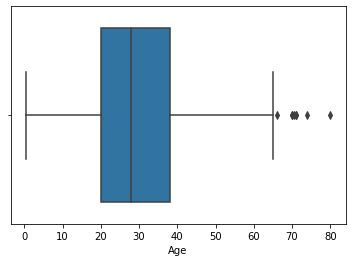

In [13]:
sns.boxplot(data["Age"])

Age above 60 is considered outlier. However, that comprises of the senior citizens in the data set which should be included in the algorithm. Hence, not removing outlier from actual data set

In [14]:
data1 = data.copy()

data1["Age"] = np.where((data1["Age"]>=60),   # Condition
         data1["Age"].median(),  # If condition is True
         data1["Age"])  # If Condition is False

data1[data["Age"]>66]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,28.0,0,0,34.6542,C
116,0,3,male,28.0,0,0,7.7500,Q
493,0,1,male,28.0,0,0,49.5042,C
630,1,1,male,28.0,0,0,30.0000,S
672,0,2,male,28.0,0,0,10.5000,S
745,0,1,male,28.0,1,1,71.0000,S
851,0,3,male,28.0,0,0,7.7750,S


<AxesSubplot:xlabel='Age'>

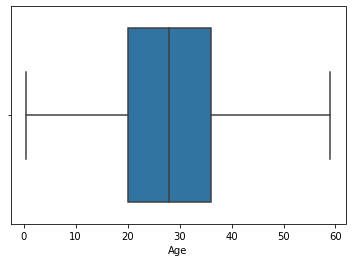

In [15]:
sns.boxplot(data1["Age"])

(array([ 54.,  46., 177., 169., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

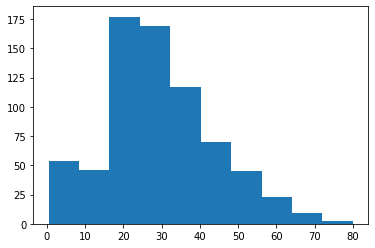

In [16]:
plt.hist(data["Age"])

(array([ 47.,  22.,  44., 134., 162., 113.,  74.,  53.,  39.,  24.]),
 array([ 0.42 ,  6.278, 12.136, 17.994, 23.852, 29.71 , 35.568, 41.426,
        47.284, 53.142, 59.   ]),
 <BarContainer object of 10 artists>)

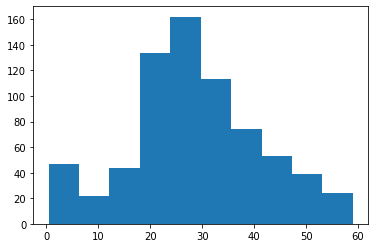

In [17]:
plt.hist(data1["Age"])

In [18]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


###### Survival Count

In [19]:
pd.DataFrame(data["Survived"].value_counts())

,Survived
0,424
1,288


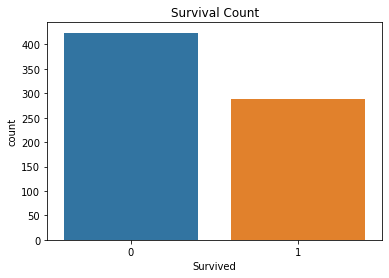

In [20]:
sns.countplot(data["Survived"])
plt.title("Survival Count")
##plt.grid()
plt.show()

###### Plotting Survival for each features

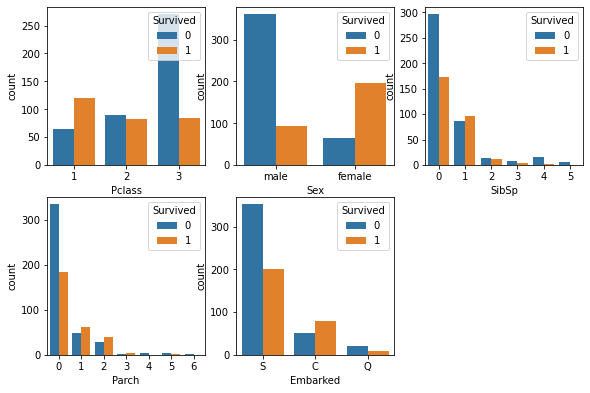

In [21]:
cols = [ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows*3.2))
fig.delaxes(axes[1,2])
for r in range(0, n_rows):
    for c in range(n_cols):
            i = r*n_cols + c
            if len(cols) > i:
                ax = axes[r][c]
                sns.countplot(data[cols[i]], hue = data["Survived"], ax = ax) 
                #ax.set_title(cols[i])
                ax.legend(title = "Survived", loc = "upper right")
plt.tight_layout
plt.show()

#### Sex: Females are more likely to survive.
#### SibSp/Parch: People traveling alone are more likely to survive.
#### class: People of higher socioeconomic class are more likely to survive.
#### Embarked: People from Port C has survial rate higher that not survived. However, Port C has more number od Survivors

In [22]:
data.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
female,0.752896
male,0.205298


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

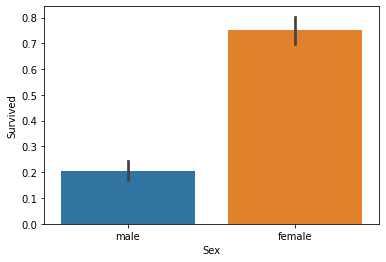

In [23]:
sns.barplot(x="Sex", y="Survived", data=data)

In [24]:
data.pivot_table("Survived", index = "Sex", columns = "SibSp")

SibSp,0,1,2,3,4,5
Sex,,,,,,
female,0.795775,0.744444,0.750000,0.5,0.333333,0.0
male,0.183486,0.322581,0.153846,0.0,0.083333,0.0


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

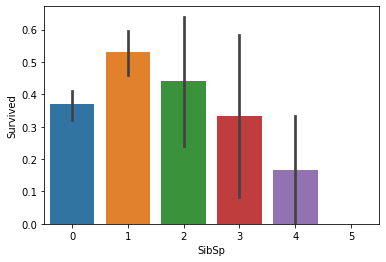

In [25]:
sns.barplot(x="SibSp", y="Survived", data=data)

In [26]:
data.pivot_table("Survived", index = "Sex", columns = "Pclass")

Pclass,1,2,3
Sex,,,
female,0.963855,0.918919,0.460784
male,0.396040,0.151515,0.150198


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

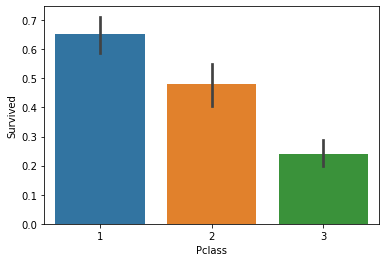

In [27]:
sns.barplot(x = "Pclass", y = "Survived", data = data)

##### Fare for Each class

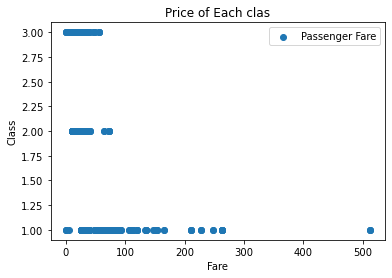

In [28]:
plt.scatter( data["Fare"], data["Pclass"], label = "Passenger Fare")
plt.ylabel("Class")
plt.xlabel("Fare")
plt.title("Price of Each clas")
plt.legend()
plt.show()

In [29]:
data[data["Fare"]==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.0,0,0,0.0,S
263,0,1,male,40.0,0,0,0.0,S
271,1,3,male,25.0,0,0,0.0,S
302,0,3,male,19.0,0,0,0.0,S
597,0,3,male,49.0,0,0,0.0,S
806,0,1,male,39.0,0,0,0.0,S
822,0,1,male,38.0,0,0,0.0,S


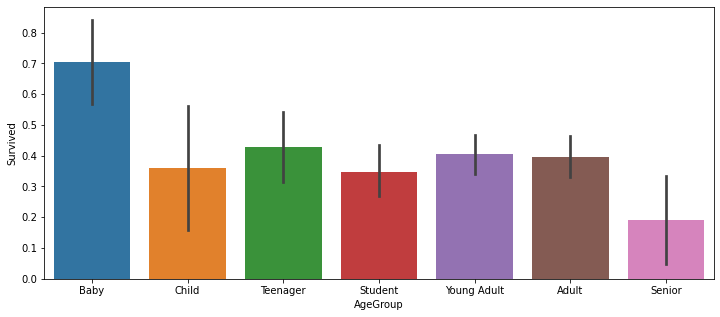

In [30]:

data["Age"] = data["Age"].fillna(-0.5)

bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [ 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
plt.figure(figsize = (12,5))
sns.barplot(x="AgeGroup", y="Survived", data=data)
plt.show()

###### Babies are more likely to survive than any other age group.

In [31]:
data.dtypes

Survived       int64
Pclass         int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
AgeGroup    category
dtype: object

In [32]:
print(data["Sex"].unique())
print(data["Embarked"].unique())

['male' 'female']
['S' 'C' 'Q']


In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data.iloc[:,2] = labelencoder.fit_transform(data.iloc[:,2].values)
data.iloc[:,7] = labelencoder.fit_transform(data.iloc[:,7].values)


In [34]:
print(data["Sex"].unique())
print(data["Embarked"].unique())

[1 0]
[2 0 1]


In [35]:
data.dtypes

Survived       int64
Pclass         int64
Sex            int32
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked       int32
AgeGroup    category
dtype: object

In [36]:
X = data[["Pclass","Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = data[["Survived"]]

X.shape, y.shape

((712, 7), (712, 1))

##### Train Test Split data




In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100)

In [38]:
data[data["Survived"] == 0]["Sex"].mean()

0.8490566037735849

In [39]:
data[data["Survived"] == 1]["Sex"].mean()

0.3229166666666667

#### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C = 1)

logreg = logreg.fit( X_train, y_train)

In [41]:
logreg.coef_, logreg.intercept_
pred = logreg.predict(X_train)

In [42]:
X_train_op = X_train.copy()
X_train_op["Survived actual"] = y_train["Survived"]
X_train_op["Predicted Values"] = pred
#X_train_op["Y_train_Pred"] = np.where(X_train_op["Y_train_Prob"] > 0.8, 1, 0)
X_train_op.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived actual,Predicted Values
728,2,1,25.0,1,0,26.0000,2,0,0
71,3,0,16.0,5,2,46.9000,2,0,0
438,1,1,64.0,1,4,263.0000,2,0,0
103,3,1,33.0,0,0,8.6542,2,0,0
660,1,1,50.0,2,0,133.6500,2,1,0


In [43]:
X_train_op["Survived actual"].value_counts()

0    343
1    226
Name: Survived actual, dtype: int64

In [44]:
X_train_op["Predicted Values"].value_counts()

0    357
1    212
Name: Predicted Values, dtype: int64

##### Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix

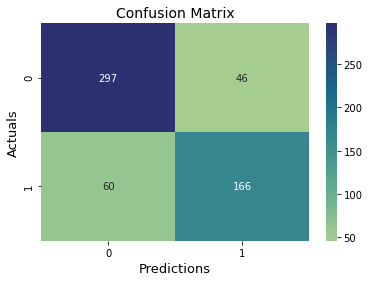

In [46]:
cnf_matrix = confusion_matrix(X_train_op["Survived actual"], X_train_op["Predicted Values"])

sns.heatmap(cnf_matrix, annot = True, cmap = "crest", fmt='.3g')
plt.ylabel("Actuals", fontsize = 13)
plt.xlabel("Predictions", fontsize = 13)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
LR_train_accuracy = np.round(accuracy_score(X_train_op["Survived actual"], 
               X_train_op["Predicted Values"])*100, 2)  # Accuarcy using package

print(" Accuracy of Train data: {}%".format(LR_train_accuracy))

 Accuracy of Train data: 81.37%


###### Prediction on Test Data

In [49]:
Test_pred = logreg.predict(X_test)            # 0 or 1

In [50]:
X_test_op = X_test.copy()
X_test_op["Y_test_actuals"] = y_test["Survived"]
X_test_op["Y_test_Pred"] = Test_pred
X_test_op.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Y_test_actuals,Y_test_Pred
720,2,0,6.0,0,1,33.0000,2,1,1
879,1,0,56.0,0,1,83.1583,0,1,1
360,3,1,40.0,1,4,27.9000,2,0,0
192,3,0,19.0,1,0,7.8542,2,1,1
770,3,1,24.0,0,0,9.5000,2,0,0


##### ACCURACY

In [51]:
LR_test_accuracy = np.round(accuracy_score(X_test_op["Y_test_actuals"], 
               X_test_op["Y_test_Pred"])*100,2)  # Accuarcy using package

print(" Accuracy of Test data: {}%".format(LR_test_accuracy))

 Accuracy of Test data: 81.82%


###  KNN Classification

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
X = data[["Pclass","Sex", "Age", "SibSp", "Parch",
          "Fare", "Embarked"]]
y = data[["Survived"]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X = pd.DataFrame(X,columns = ["Pclass","Sex", "Age", 
                              "SibSp", "Parch", "Fare",
                              "Embarked"])

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size = 0.8, random_state = 100)   # 70-30 Split

knn = KNeighborsClassifier(n_neighbors = 7)  
knn = knn.fit(X_train, y_train)


In [54]:
KNN_predict = predict = knn.predict(X_train)

test_predict = predict = knn.predict(X_test)

print("Accuracy of Train Data:", knn.score(X_train, y_train)*100) 

print("Accuracy on Test Data:", knn.score(X_test, y_test)*100)

Accuracy of Train Data: 84.3585237258348
Accuracy on Test Data: 76.92307692307693


### DECISION TREEE CLASSIFIER

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()  
dt = dt.fit(X_train, y_train)
     
dt_predict = dt.predict(X_train)   # Train

dt_test_predict = dt.predict(X_test)

print("Accuracy of Train Data: {}%".format(np.round(dt.score(X_train, y_train)*100)))

print("Accuracy of Test Data: {}%".format(np.round(dt.score(X_test, y_test)*100)))


Accuracy of Train Data: 99.0%
Accuracy of Test Data: 81.0%


### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(max_depth = 2, n_estimators=100, random_state = 12345)
rfc = rfc.fit(X_train, y_train)

In [59]:
rfc_predict = rfc.predict(X_train)

rfc_test_predict = rfc.predict(X_test)


print("Accuracy of Train Data: {}%".format(np.round(rfc.score(X_train, y_train)*100)))

print("Accuracy of Test Data: {}%".format(np.round(rfc.score(X_test, y_test)*100)))


Accuracy of Train Data: 81.0%
Accuracy of Test Data: 77.0%


#### Accuracy  highest for train and test data both is with Logistic Regrssion Model

In [60]:
X_train_op

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived actual,Predicted Values
59,3,1,11.0,5,2,46.9000,2,0,0
278,3,1,7.0,4,1,29.1250,1,0,0
595,3,1,36.0,1,1,24.1500,2,0,0
40,3,0,40.0,1,0,9.4750,2,0,0
337,1,0,41.0,0,0,134.5000,0,1,1
...,...,...,...,...,...,...,...,...,...
728,2,1,25.0,1,0,26.0000,2,0,0
71,3,0,16.0,5,2,46.9000,2,0,0
438,1,1,64.0,1,4,263.0000,2,0,0
103,3,1,33.0,0,0,8.6542,2,0,0
